In [ ]:
import tensorflow_datasets as tfds
(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.ZLAKCF_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.ZLAKCF_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input,Rescaling, GlobalAveragePooling2D
from tensorflow.keras.layers import ReLU, Dropout,LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential

In [ ]:
IMG_SIZE = 224

def preprocess(img, label):
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    return img, label

train_ds = ds_train.map(preprocess).batch(32).prefetch(1)
test_ds = ds_test.map(preprocess).batch(32).prefetch(1)


In [ ]:
base = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base.trainable = False

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_ds, validation_data=test_ds, epochs=5)
model.save("model.h5")


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 198ms/step - accuracy: 0.8032 - loss: 0.5420 - val_accuracy: 0.9301 - val_loss: 0.3151
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.9973 - loss: 0.0612 - val_accuracy: 0.9328 - val_loss: 0.2497
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9988 - loss: 0.0309 - val_accuracy: 0.9328 - val_loss: 0.2184
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.9998 - loss: 0.0195 - val_accuracy: 0.9328 - val_loss: 0.2001
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9999 - loss: 0.0137 - val_accuracy: 0.9328 - val_loss: 0.1882


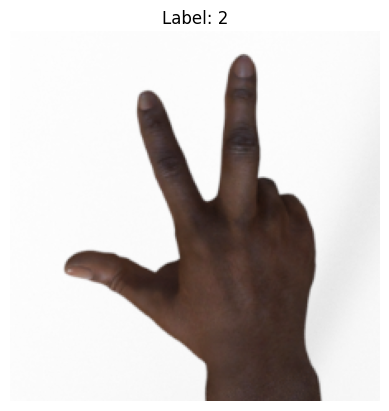

In [ ]:
# prompt: print any single image form the train_ds

import matplotlib.pyplot as plt

for image, label in train_ds.take(1):
  plt.imshow(image[0].numpy())
  plt.title(f'Label: {label[0].numpy()}')
  plt.axis('off')
  plt.show()
  break # Only display the first image

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
epochs=100

import tensorflow as tf


model=Sequential([
    Input((224,224,3)),
    Rescaling(1./255),

    Conv2D(32,3),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D(),

    Conv2D(64,3),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D(),

    Conv2D(128,3),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D(),

    Flatten(),

    Dense(64,kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    ReLU(),
    Dropout(0.2),

    Dense(32,kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),

    Dense(3,activation='softmax')
])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "CNN.h5",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_ds,epochs=epochs,validation_data=test_ds,callbacks=[early_stop,checkpoint])

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8316 - loss: 0.6650
Epoch 1: val_loss improved from inf to 3.31782, saving model to CNN.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - accuracy: 0.8328 - loss: 0.6624 - val_accuracy: 0.3333 - val_loss: 3.3178
Epoch 2/100
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9960 - loss: 0.2084
Epoch 2: val_loss did not improve from 3.31782
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9960 - loss: 0.2079 - val_accuracy: 0.3333 - val_loss: 6.5253
Epoch 3/100
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9942 - loss: 0.1604
Epoch 3: val_loss did not improve from 3.31782
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9942 - loss: 0.1602 - val_accuracy: 0.3333 - val_loss: 5.3100
Epoch 4/100
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9889 - loss: 0.1643
Epoch 4: val_loss did not improve from 3.31782
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.9890 - loss: 0.1637 - val_accuracy: 0.3333 - val_loss: 9.4754


In [ ]:
from google.colab import files
files.download('CNN.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>